# Demos: Lecture 4

In [9]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
psi = np.array([np.sqrt(3)/2, -0.5 * np.exp(i * 5/4)])
p = np.array([1/np.sqrt(2), 1/np.sqrt(2) * np.exp()])

NameError: name 'j' is not defined

## Exercise 1: $Y$-basis rotation

In [4]:
dev = qml.device('default.qubit', wires=1)
  
def convert_to_y_basis():
    # YOUR CODE HERE; find a circuit that sends 
    # |0> -> |p> and |1> -> |m>
    qml.Hadamard(wires=0)
    qml.S(wires=0)

# Compute the measurement outcome probabilities of state
#     sqrt(3)/2 |0> - (1/2)e^(i5/4) |1> 
# if measuring in this basis.
@qml.qnode(dev)
def rotate_basis():
    # state preparation
    qml.RY(-np.pi/3, wires=0)
    qml.PhaseShift(5/4, wires=0)

    # Basis rotation
    adjoint_rotation = qml.adjoint(convert_to_y_basis) # takes quantum function and returns function that applies adjoint
    adjoint_rotation()

    return qml.probs(wires=0)



In [5]:

rotate_basis()

tensor([0.08907761, 0.91092239], requires_grad=True)

(<Figure size 700x200 with 1 Axes>, <Axes: >)

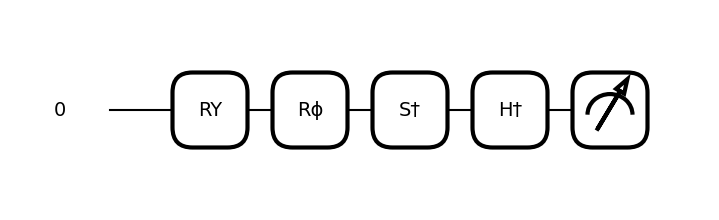

In [6]:

qml.draw_mpl(rotate_basis)()

## Demo 1: `qml.ctrl`

Implement the following circuit; apply the controlled operations in two different ways.

<img src="fig/mq-circuit.png" width=350>

In [12]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(x, y, z):
    qml.CRX(x,  wires=[0, 1]) # controlled RX, apply to qubit 1 controlled on qubit 0
    qml.ctrl(qml.RY, control=0)(y, wires=2) # 
    qml.RX(x, wires=0)
    qml.RY(y, wires=1)
    qml.RZ(z, wires=2)
    qml.Hadamard(wires=2)
    return qml.probs(wires=[1])

circuit(0.1, 0.2, 0.3)


tensor([0.99003329, 0.00996671], requires_grad=True)

## Demo 2: multi-qubit measurements

Given the previous circuit, compute the measurement outcome probabilities of:
 - each 3-qubit computational basis state
 - the probability of the first two qubits being in state $|11\rangle$